<a href="https://colab.research.google.com/github/JapiKredi/Pinnacle_AI_program_AnalyticsVidyha/blob/main/Assignment_EDA_JasperBongers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the dependencies
import numpy as np
import pandas as pd
import datetime
from time import strftime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the dataset
data = pd.read_csv('/content/drive/My Drive/nyc_taxi_trip_duration.csv')

In [4]:
# Head of the data
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [5]:
# Tail of the data
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


In [6]:
# Analysis of the shape f the dataframe
data.shape
# The dataset consists of 729322 rows and 11 columns
# 729322 trips and 11 features

(729322, 11)

In [7]:
# Analysis of the datatypes of the columns
data.dtypes

,0
id,object
vendor_id,int64
pickup_datetime,object
dropoff_datetime,object
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object


In [8]:
# Geeting the info function:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [9]:
# Check for missing values
data.isnull().sum()
# Conclusion: no missing values

,0
id,0
vendor_id,0
pickup_datetime,0
dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
store_and_fwd_flag,0


In [10]:
# Lets see the dataset description (for all numerical columns)
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


### Conclusions

xxxx

xxxx

xxxx

xxxx

In [11]:
## cheaking if any duplicate values
data.duplicated().sum()
## no duplicated values

0

# Encoding

let's analyze each column in the provided data and suggest appropriate encoding techniques based on the nature of the data:

1. **id**: a unique identifier for each trip.

2. **Vendor_id**: a code indicating the provider associated with the trip record.

3. **Pickup_datetime**: date and time when the meter was engaged.

4. **Dropoff_datetime**: date and time when the meter was disengaged.

5. **Passenger_count**: the number of passengers in the vehicle (driver entered value).

6. **Pickup_longitude**: the longitude where the meter was engaged.

7. **pickup_latitude**: the latitude where the meter was engaged.

8. **Dropoff_longitude**: the longitude where the meter was disengaged.

9. **Dropoff_latitude**: the latitude where the meter was disengaged.

10. **Store_and_fwd _flag**: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip).

11. **trip_duration**: (target) duration of the trip in seconds.


# Integer Data Type


In [12]:
# Identifying variables with integer datatype
data.dtypes[data.dtypes == 'int64']

,0
vendor_id,int64
passenger_count,int64
trip_duration,int64


**vendor_id** -> it is okay for this to be an int64.

**passenger_count** -> very good for this to be an int64.

**trip_duration** -> number of seconds can be best translated into a datetime object. If we want to understand the duration of events in a more human-readable format (e.g., hours, minutes, seconds), converting the seconds into a timedelta object can be helpful.


In [13]:
# Assuming 'data' is your DataFrame and 'event_duration' is the column with the number of seconds
data['trip_duration'] = pd.to_timedelta(data['trip_duration'], unit='s')

In [14]:
# Verify if the trip_duration feature was changed into a Datetime object
data.info()
# Conclusion: Yes! properly converted.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   id                  729322 non-null  object         
 1   vendor_id           729322 non-null  int64          
 2   pickup_datetime     729322 non-null  object         
 3   dropoff_datetime    729322 non-null  object         
 4   passenger_count     729322 non-null  int64          
 5   pickup_longitude    729322 non-null  float64        
 6   pickup_latitude     729322 non-null  float64        
 7   dropoff_longitude   729322 non-null  float64        
 8   dropoff_latitude    729322 non-null  float64        
 9   store_and_fwd_flag  729322 non-null  object         
 10  trip_duration       729322 non-null  timedelta64[ns]
dtypes: float64(4), int64(2), object(4), timedelta64[ns](1)
memory usage: 61.2+ MB


# Float Data Type

In [15]:
# Identifying variables with float datatype
data.dtypes[data.dtypes == 'float64']

,0
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64


Longitude and latitude values require precision, which is well-supported by the float64 data type.

So no need to convert these.

# Object Data Type

In [16]:
# Identifying variables with float datatype
data.dtypes[data.dtypes == 'object']

,0
id,object
pickup_datetime,object
dropoff_datetime,object
store_and_fwd_flag,object


**pickup_datetime** -> good to convert into a datetime object.

**dropoff_datetime** -> good to convert into a datetime object.

**store_and_fwd_flag** -> good to convert this into 0's and 1's.



In [17]:
# Convert pickup_datetime and dropoff_datetime into a Datetime object
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [18]:
# Checking if the datatype was converted properly
data.info()
# converted from Object to float64. Need to convert this into int64.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   id                  729322 non-null  object         
 1   vendor_id           729322 non-null  int64          
 2   pickup_datetime     729322 non-null  datetime64[ns] 
 3   dropoff_datetime    729322 non-null  datetime64[ns] 
 4   passenger_count     729322 non-null  int64          
 5   pickup_longitude    729322 non-null  float64        
 6   pickup_latitude     729322 non-null  float64        
 7   dropoff_longitude   729322 non-null  float64        
 8   dropoff_latitude    729322 non-null  float64        
 9   store_and_fwd_flag  729322 non-null  object         
 10  trip_duration       729322 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(2), object(2), timedelta64[ns](1)
memory usage: 61.2+ MB


In [19]:
# Use pd.get_dummies to convert 'store_and_fwd_flag' into numerical values
data = pd.get_dummies(data, columns=['store_and_fwd_flag'])

In [20]:
# Checking if the datatype was converted properly
data.info()
# converted from Object to float64. Need to convert this into int64.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   id                    729322 non-null  object         
 1   vendor_id             729322 non-null  int64          
 2   pickup_datetime       729322 non-null  datetime64[ns] 
 3   dropoff_datetime      729322 non-null  datetime64[ns] 
 4   passenger_count       729322 non-null  int64          
 5   pickup_longitude      729322 non-null  float64        
 6   pickup_latitude       729322 non-null  float64        
 7   dropoff_longitude     729322 non-null  float64        
 8   dropoff_latitude      729322 non-null  float64        
 9   trip_duration         729322 non-null  timedelta64[ns]
 10  store_and_fwd_flag_N  729322 non-null  bool           
 11  store_and_fwd_flag_Y  729322 non-null  bool           
dtypes: bool(2), datetime64[ns](2), float64(4), i

In [21]:
# Convert the 'store_and_fwd_flag' column to int64
data['store_and_fwd_flag_N'] = data['store_and_fwd_flag_N'].astype('int64')

In [22]:
# Checking the unique values of store_and_fwd_flag_N
print(data['store_and_fwd_flag_N'].unique())
# It has clearly been converted to a float; intention was to convert it to an int64.

[1 0]


In [23]:
# Convert the 'store_and_fwd_flag' column to int64
data['store_and_fwd_flag_Y'] = data['store_and_fwd_flag_Y'].astype('int64')

In [24]:
# Checking if the datatype was converted properly
data.info()
# Successfully converted to int64.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype          
---  ------                --------------   -----          
 0   id                    729322 non-null  object         
 1   vendor_id             729322 non-null  int64          
 2   pickup_datetime       729322 non-null  datetime64[ns] 
 3   dropoff_datetime      729322 non-null  datetime64[ns] 
 4   passenger_count       729322 non-null  int64          
 5   pickup_longitude      729322 non-null  float64        
 6   pickup_latitude       729322 non-null  float64        
 7   dropoff_longitude     729322 non-null  float64        
 8   dropoff_latitude      729322 non-null  float64        
 9   trip_duration         729322 non-null  timedelta64[ns]
 10  store_and_fwd_flag_N  729322 non-null  int64          
 11  store_and_fwd_flag_Y  729322 non-null  int64          
dtypes: datetime64[ns](2), float64(4), int64(4), 

In [25]:
# Checking the unique values of store_and_fwd_flag_Y
print(data['store_and_fwd_flag_Y'].unique())
# It has clearly been converted to a float; intention was to convert it to an int64.

[0 1]


### Datetimeobject

We can craate new Datetime objects by some simple calculations on Datetime objects


In [26]:
# Create a new variable real_trip_duration by taking the difference between pickup_datetime and dropoff_datetime
data['real_trip_duration'] = data['dropoff_datetime'] - data['pickup_datetime']

In [27]:
# Get the head function for dataframe data
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,store_and_fwd_flag_N,store_and_fwd_flag_Y,real_trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0 days 00:06:40,1,0,0 days 00:06:40
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0 days 00:18:20,1,0,0 days 00:18:20
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0 days 00:27:15,1,0,0 days 00:27:15
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0 days 00:19:01,1,0,0 days 00:19:01
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0 days 00:14:08,1,0,0 days 00:14:08


In [40]:
# Comparing (target) trip_duration with real_trip_duration
data[['trip_duration', 'real_trip_duration']].sum()
# The (target) trip_duration with real_trip_duration are excately the same

,0
trip_duration,8037 days 23:34:16
real_trip_duration,8037 days 23:34:16


In [42]:
# Check if the columns are exactly the same
are_equal = data['trip_duration'].equals(data['real_trip_duration'])
print(f"The columns are exactly the same: {are_equal}")
# The (target) trip_duration with real_trip_duration are excately the same

The columns are exactly the same: True


In [43]:
# As real_trip_duration is excately the sale as trip_duration
# remove the column real_trip_duration from the dataset as it does not contain any new information.
data.drop('real_trip_duration', axis=1, inplace=True)

In [44]:
# Change trip_duration from a Datatime datatype to int64 in order to make the processing faster and consume less memory
data['trip_duration'] = data['trip_duration'].astype('int64')

In [45]:
# Check if both changes have been implemented properly
data.info()
# Conclusion: Yes!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    729322 non-null  object        
 1   vendor_id             729322 non-null  int64         
 2   pickup_datetime       729322 non-null  datetime64[ns]
 3   dropoff_datetime      729322 non-null  datetime64[ns]
 4   passenger_count       729322 non-null  int64         
 5   pickup_longitude      729322 non-null  float64       
 6   pickup_latitude       729322 non-null  float64       
 7   dropoff_longitude     729322 non-null  float64       
 8   dropoff_latitude      729322 non-null  float64       
 9   trip_duration         729322 non-null  int64         
 10  store_and_fwd_flag_N  729322 non-null  int64         
 11  store_and_fwd_flag_Y  729322 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(5), object(1)
memo

# Univariate analysis

## Distribution

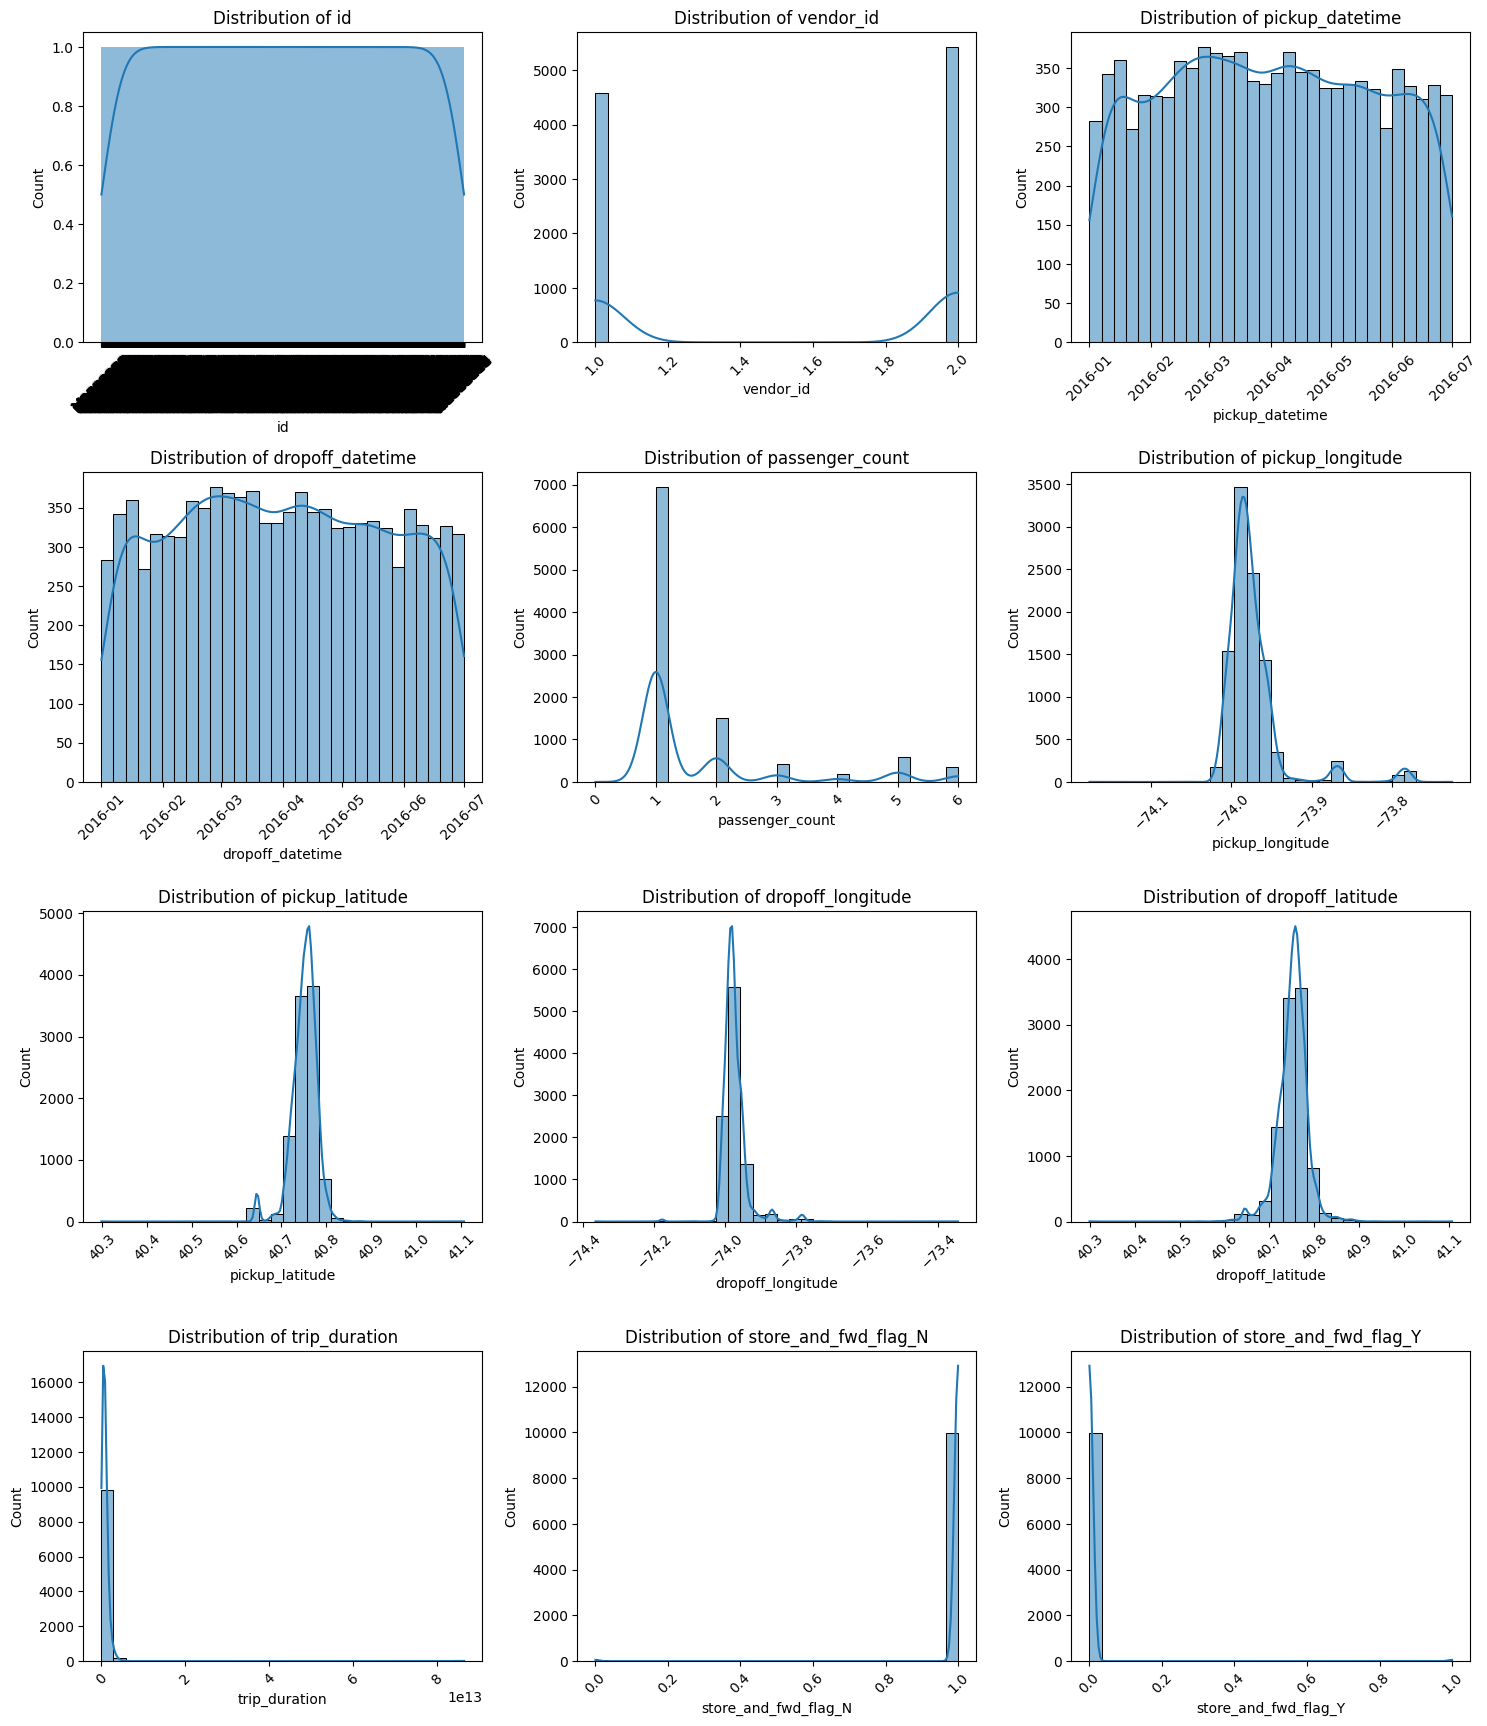

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Taking a subset to minimize impact on memory
# Taking a subset of 10,000 rows will app generate the same distribution as the full dataset

data_subset = data.iloc[:10000]  # Take the first 10,000 rows

# Assuming 'data' is your DataFrame
plt.figure(figsize=(15, 30))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(data_subset.columns):
    plt.subplot(7, 3, i + 1)
    # Limit the number of bins to avoid excessive memory usage
    try:
        plt.title(f'Distribution of {column}')
        sns.histplot(data_subset[column], kde=True, bins=30)
        plt.xticks(rotation=45)
    except MemoryError:
        print(f"MemoryError: Skipping column {column} due to memory constraints")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Normalized Distribution (Gaussian)

In [49]:
# Select only the numercial data
numerical_data = data.select_dtypes(include=['int64', 'float64'])
# Remove id , vendor_id, store_and_fwd_flag_N, store_and_fwd_flag_Y, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude
numerical_data = numerical_data.drop(['vendor_id', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1)

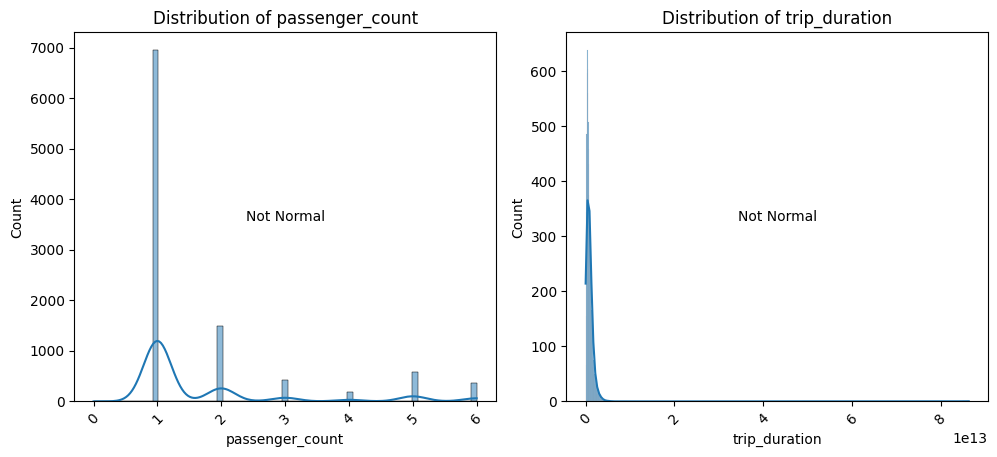

In [50]:
# Taking a subset to minimize impact on memory
# Taking a subset of 10,000 rows will app generate the same distribution as the full dataset
data_subset = numerical_data.iloc[:10000]  # Take the first 10,000 rows

from scipy import stats

plt.figure(figsize=(15, 30))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(data_subset.columns):
    plt.subplot(7, 3, i+1)
    sns.histplot(data_subset[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

    # Add additional analysis to detect distribution type
    # Check for normal distribution
    k2, p = stats.normaltest(data_subset[column])
    if p < 0.05:
        plt.text(0.5, 0.5, "Not Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.5, "Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Skewed Distribution (negative and positive)


In [ ]:
# Taking a subset to minimize impact on memory
# Taking a subset of 10,000 rows will app generate the same distribution as the full dataset
data_subset = numerical_data.iloc[:10000]  # Take the first 10,000 rows

# Taking a subset to minimize impact on memory
plt.figure(figsize=(15, 10))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(data_subset.columns):
    plt.subplot(7, 3, i+1)
    sns.histplot(data_subset[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

    # Check for skewness
    skewness = stats.skew(data[column])
    if skewness < -1 or skewness > 1:
        plt.text(0.5, 0.3, f"Skewed ({skewness:.2f})", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.3, f"Not Skewed", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7e19092424d0> (for post_execute):


KeyboardInterrupt: 

## Outliers


In [ ]:
# For the outlier analysis we cannot take a subset.

plt.figure(figsize=(15, 30))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(numerical_data.columns):
    plt.subplot(7, 3, i+1)
    sns.boxplot(numerical_data[column])
    plt.title(f'Box plot of {column}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Bivariate analysis

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'correlation_matrix' is your calculated correlation matrix
# Replace 'correlation_matrix' with the name of your correlation matrix if different

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Using a package ydata_profiling do do an automatic EDA of ur dataset and see what is possible (for educational purposes)

In [ ]:
!pip install ydata_profiling

In [ ]:
# Import the ProfileReport class from the ydata_profiling module
from ydata_profiling import ProfileReport

In [ ]:
# Generate the profile report
report = ProfileReport(data)

# Save the report to a file
report.to_file("/content/drive/My Drive/data_profile_report.html")

# Alternatively, you can also display the report directly
report.to_notebook_iframe()

In [ ]:
# THe end